# <font face="gotham" color="Green">  Prototyping with Deep Learning  </font>

# <font face="gotham" color="Brown">  Getting started with  </font>


![PyTorch](imgs/pytorch.png)




Official resources:
* [Deep Learning with PyTorch: a 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [PyTorch documentation](https://pytorch.org/docs/stable/index.html)


## 1. Basic concepts

Tensors
--------------------------------------------

Tensors are a specialized data structure that are very similar to arrays
and matrices. In PyTorch, we use tensors to encode the inputs and
outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on
GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll
be right at home with the Tensor API. If not, follow along in this quick
API walkthrough.

> Tensors are IMMUTABLE. Just like python tuples and sets you can NOT update the contents of a tensor. You can only create a new tensor. 




Install [PyTorch](https://pytorch.org/get-started/locally/)

In [1]:
#!pip3 install torch torchvision torchaudio

In [2]:
import torch
import numpy as np

Tensor Initialization

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.



In [3]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [4]:
type(x_data)

torch.Tensor

In [5]:
x_data

tensor([[1, 2],
        [3, 4]])

**From a NumPy array**

Tensors can be created from NumPy arrays.



In [6]:
#coverts list to np.array
np_array = np.array(data)
#convert np.array to tensor
x_np = torch.from_numpy(np_array)

In [7]:
x_np

tensor([[1, 2],
        [3, 4]])

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.



In [8]:
x_ones = torch.ones_like(x_data) 
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) 
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9902, 0.8660],
        [0.2200, 0.2702]]) 



**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [9]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2306, 0.9226, 0.0769],
        [0.2179, 0.1741, 0.4137]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### Tensor Attributes


Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [10]:
tensor = torch.rand(3, 4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




#### Tensor Operations


Over 100 tensor operations, including transposing, indexing, slicing,
mathematical operations, linear algebra, random sampling, and more are
comprehensively described
[here](https://pytorch.org/docs/stable/torch.html)

Each of them can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Edit > Notebook
Settings.




**Multiplying tensors**



In [11]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[0.0101, 0.1809, 0.0163, 0.9717],
        [0.3035, 0.0636, 0.0080, 0.1841],
        [0.0120, 0.9534, 0.4247, 0.4839]]) 

tensor * tensor 
 tensor([[0.0101, 0.1809, 0.0163, 0.9717],
        [0.3035, 0.0636, 0.0080, 0.1841],
        [0.0120, 0.9534, 0.4247, 0.4839]])


This computes the matrix multiplication between two tensors



In [12]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[1.1790, 0.5970, 1.1951],
        [0.5970, 0.5591, 0.6633],
        [1.1951, 0.6633, 1.8740]]) 

tensor @ tensor.T 
 tensor([[1.1790, 0.5970, 1.1951],
        [0.5970, 0.5591, 0.6633],
        [1.1951, 0.6633, 1.8740]])


#### Tensor to NumPy array




In [13]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.



In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


NumPy array to Tensor




In [15]:
n = np.ones(5)
t = torch.from_numpy(n)

 # 2. Building a Neural Network

## 2.1. Data

![PyTorch](imgs/data.jpeg)

**Handling data** ( i.e. steps of  acquiring, preprocessing and how you will iterate over your data) consumes majority of your time while working on ML projects. In this tutorial we will learn a popular dataset called MNIST and use a package called [torchvision](https://pytorch.org/vision/stable/index.html). 

[MNIST](http://yann.lecun.com/exdb/mnist/) dataset has 70k small grayscale images.

In [16]:
#!pip install torchvision

In [18]:
import torch
import torchvision
from torchvision import transforms, datasets
from IPython.display import Image

![MNIST](imgs/mnist.png)

#### Download MNIST dataset

In [ ]:
 '''Eventhough we are grabbing the data from Pytorch,
    it's not in tensor format so we use the transform 
    method to convert it to tensors.'''

train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

***Loading data***

In [20]:
train_set = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True) 
test_set = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True)

batch_size is how many datapoints we want to pass at a time.

In [21]:
#Iterate over the trainset
#Output 10 examples of handwritten digits(x) and 10 tensors of the actual outpputs(y)
for data in train_set:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Each iteration will contain a batch of 10 elements (that was the batch size we chose), and 10 classes. Let's just look at one:

In [34]:
X, y = data[0][0], data[1][0]

print(y)

tensor(3)


* X is our input data. The features. The thing we want to predict.
* y is our label. The classification. The thing we hope the neural network can learn to predict.

We can see this by doing.

```data[0]``` is a bunch of features for things and ```data[1]``` is all the targets.

In [23]:
data[0]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [24]:
data[1]

tensor([3, 9, 8, 8, 6, 2, 6, 0, 3, 4])

As you can see, ```data[1]``` is just a bunch of labels. So, since ```data[1][0]``` is a 7, we can expect ```data[0][0]``` to be an image of a 7. Let's see!

In [25]:
import matplotlib.pyplot as plt

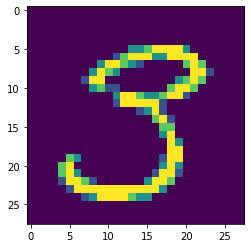

In [37]:
#plt.imshow(data[0][0])
#throws shape error 
plt.imshow(data[0][0].view(28,28), cmap='gray')
plt.show()

To learn Visualization with Python check out [matplotlib](https://matplotlib.org/stable/tutorials/index)

In [27]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


Now we have our data downloaded and loaded to memory as train_set and test_set

In [28]:
len(train_set)

6000

In [29]:
len(test_set)

1000

## 2.2. Defining a Neural Network

In [38]:
import torch.nn as nn # OOP
import torch.nn.functional as F

The ```torch.nn``` import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc)

The ```torch.nn.functional```  specifically gives us access to some handy functions that we might not want to write ourselves. such as relu or "rectified linear" activation function. Instead of writing all of the code for these things this allows us to just import and use them.

To build our model, we're going to create a class. We'll call this class net and this net will inhereit from the nn.Module class:



In [43]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)  #784 is 28*28 flattened image Input output is 64 can be any
        self.fc2 = nn.Linear(64, 64) #Hidden layers
        self.fc3 = nn.Linear(64 , 64)
        self.fc4 = nn.Linear(64, 10) #There are 10 classes
        
        #We defined our NN but no way to feed in data

    def forward(self, x):
        x = F.relu(self.fc1(x)) #  relu, activation function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        output = self.fc4(x) #No activation
        return output
        

net = Net()
#print(model)

First layer takes in 28x28, because our images are 28x28 images of hand-drawn digits. A basic neural network is going to expect to have a flattened array, so not a 28x28, but instead a 1x784.

We used relu(rectified linear unint) as activation function. 

Basically, these activation functions are keeping our data scaled between 0 and 1.

Finally, for the output layer, we used softmax. Softmax makes sense to use for a multi-class problem, where each thing can only be one class or the other. This means the outputs themselves are a confidence score, adding up to 1

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:
- The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The number of hidden neurons should be less than twice the size of the input layer.

Moreover, the number of neurons and number layers required for the hidden layer also depends upon training cases, the complexity of, data that is to be learned, and the type of activation functions used.


## 2.3. Defining a Loss function and optimizer

In [44]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) # Adam:Adaptive momentm ,  lr: learning rate 

* Our ```loss_function``` is what calculates "how far off" our classifications are from reality.
It is a measurement of how far off the neural network is from the targeted output.


![Softmax](imgs/softmax.png)



In pytorch the ```nn.CrossEntropyLoss()``` already applies softmax so no need to add softmax at the last layer.

![Sigmoid](imgs/Sigmoid.png)



In [42]:
class Binary_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)  #784 is 28*28 flattened image Input output is 64 can be any
        self.fc2 = nn.Linear(64, 64) #Hidden layers
        self.fc3 = nn.Linear(64 , 64)
        self.fc4 = nn.Linear(64, 1) #one out put Yes or No
        
        #

    def forward(self, x):
        x = F.relu(self.fc1(x)) #  relu, activation function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        output = self.fc4(x) 
        #Sigmoid at the end
        y_pred = torch.sigmoid(output)
        return ypred
        #F.log_softmax(x, dim=1)

* ```optimizer``` adjusts our model's adjustable parameters like the weights, to slowly, over time, fit our data.

* The learning rate dictates the magnitude of changes that the optimizer can make at a time. Thus, the larger the LR, the quicker the model can learn, but also you might find that the steps you allow the optimizer to make are actually too big and the optimizer gets stuck bouncing around rather than improving. Too small, and the model can take much longer to learn as well as also possibly getting stuck. Indeed a too small value will require a very large number of epochs to converge while the algorithm might not converged by setting a too large value.


![LR](https://deeplearningmath.org/images/learning_rate_choice.png)

Moreover, it is not recommended to use a constant learning rate. Indeed, even if a large value can help the algorithm to arrive quickly to a good solution, then it might oscillate around this state for a long time or diverge if the learning rate is maintained. A solution is to allow the learning rate to decay over time.

> For simpler tasks, a learning rate of 0.001 usually is more than fine. For more complex tasks, you will see a learning rate with what's called a decay. Basically you start the learning rate at something like 0.001, or 0.01...etc, and then over time, that learning rate gets smaller and smaller. The idea being you can initially train fast, and slowly take smaller steps, hopefully getthing the best of both worlds.

A common approach is to half the learning rate every 5 epochs, or by 0.1 every 20 epochs. A proposed heuristic is to track the validation error while training with a fixed learning rate, and if the validation error stops improving then reduce the learning rate by a constant (e.g. 0.5).

## 2.4. Training the network

### Epoch

![Epoch](https://miro.medium.com/max/1024/1*cDhZ56QNC5mrl6kjE0C2JA.png)

In deep learning an epoch is a [hyperparameter](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) which is defined before training a model. In other words, one epoch is when an entire dataset is passed both forward and backward through the neural network only once.

The reason why we have to split the training step by epochs is decrease the amount of data we feed to the computer at once. So, we divide it in several smaller batches. 

We use more than one epoch because passing the entire dataset through a neural network is not enough and we need to pass the full dataset multiple times to the same neural network. But since we are using a limited dataset we can do it in an iterative process. A batch is the total number of training examples present in a single batch and an iteration is the number of batches needed to complete one epoch.

**Example**: 

If we divide a dataset of 2000 training examples into 500 batches, then 4 iterations will complete 1 epoch.

* Too few epochs, and your model wont learn everything it could have.

* Too many epochs and your model will over fit to your in-sample data (basically memorize the in-sample data, and perform poorly on out of sample data).

Let's go with 3 epochs for now. So we will loop over epochs, and each epoch will loop over our data

In [45]:
# Train the model
n_total_steps = len(train_set)
num_epochs = 3

for epoch in range(num_epochs): #3 full passes over the data
    for i, (images, labels) in enumerate(train_set):  
        # origin shape: [10, 1, 28, 28]
        # resized: [10, 784]
        images = images.reshape(-1, 28*28) #with -1 Pytorch will automatically identify the first dimentions
        labels = labels
        
        
        # Forward pass
        outputs = net(images) # pass in the reshaped batch (recall they are 28x28 atm)
        loss = loss_function(outputs, labels) # calculate and grab the loss value
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step() # attempt to optimize weights to account for loss/gradients
        
        if (i+1) % 3000 == 0: #Every 3000 steps prinyt some info 
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/3], Step [3000/6000], Loss: 0.0278
Epoch [1/3], Step [6000/6000], Loss: 0.0036
Epoch [2/3], Step [3000/6000], Loss: 0.2456
Epoch [2/3], Step [6000/6000], Loss: 0.0259
Epoch [3/3], Step [3000/6000], Loss: 0.0332
Epoch [3/3], Step [6000/6000], Loss: 0.0260


Once we pass data through our neural network, getting an output, we can compare that output to the desired output. With this, we can compute the gradients for each parameter, which our optimizer (Adam, SGD...etc) uses as information for updating weights.


This is why it's important to do a ```net.zero_grad()``` for every step, otherwise these gradients will add up for every pass, and then we'll be re-optimizing for previous gradients that we already optimized for.

So, for each epoch, and for each batch in our dataset, what do we do?

* Grab the features (X) and labels (y) from current batch
* Zero the gradients (net.zero_grad)
* Pass the data through the network
* Calculate the loss
* Adjust weights in the network with the hopes of decreasing loss




## 2.5. Test the network on the test data

As we iterate, we get loss, which is an important metric, but we care about accuracy. So, how did we do? To test this, all we need to do is iterate over our test set, measuring for correctness by comparing output to target values.

In [46]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
# This is out of sample data and we just want to know how good is the network 

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_set:
        images = images.reshape(-1, 28*28)
        labels = labels
        outputs = net(images)
        
        for idx, i in enumerate(outputs):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == labels[idx]:
                n_correct += 1
            n_samples += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')



Accuracy of the network on the 10000 test images: 95.93 %


In [47]:
# get some random testing images
dataiter = iter(test_set)
images, labels = dataiter.next()

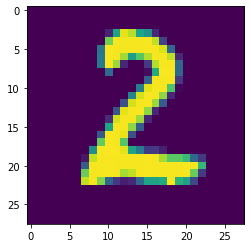

In [50]:
import matplotlib.pyplot as plt
plt.imshow(images[2].view(28,28))
plt.show()

In [51]:
print(torch.argmax(net(images[2].view(-1,784))[0]))

tensor(2)


## 2.6.  Saving and Loading the model

Model training usually takes a lot of time, so once the model is trained it is smart to save it.

In [47]:
torch.save(net, 'Models/torch_model.pth')

In [48]:
model = torch.load('Models/torch_model.pth')

## 🏁 6. Conclusion

Now, you know:

1. a popular deep learning framework: PyTorch,
2. the basic building blocks of deep learning,
3. how to load data and define a Neural Network, 
4. how to train and test a Neural Network using PyTorch.